In [368]:
#Accessing Google Drive from Google colab
#You can use the drive module from google.colab to mount your entire Google Drive to Colab
#Executing the below code , some messages will be prompted:
#Select the Google Drive Account you want to mount 
#Select “Allow” 
#Once the Drive is mounted, you’ll get the message “Mounted at /content/gdrive”, and you’ll be able to browse through the contents of your Drive from the file-explorer pane.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [369]:
# Get path of csv file
path = "/content/drive/MyDrive/Colab Notebooks/day.csv"

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Reading and Understanding the Data

In [371]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [372]:

  bike  = pd.read_csv(path)

In [373]:

# Check the head of the dataset
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [374]:
bike.shape

(730, 16)

In [375]:

bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Finding <br/>
There are no missing / Null values

In [376]:

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [377]:
# Checking the size of the dataframe
bike.size

11680

Finding : <br/>
Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type.

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

DATA QUALITY CHECK

Duplicate Check

In [378]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [379]:
bike.shape

(730, 16)

Insights <br/>
The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

Data Cleaning <br/>
Checking value_counts() for entire dataframe.

This will help to identify any Unknow/Junk values present in the dataset.

In [380]:
#Create a copy of the  dataframe, without the 'instant' column, 

#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]
bike_dummy.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [381]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:



1.   instant : Its only an index value
2.   dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.
1.   casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.
2. We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation











In [382]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [383]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [384]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Step 2: Visualizing the data

Performing numerical and categorical analysis on the data

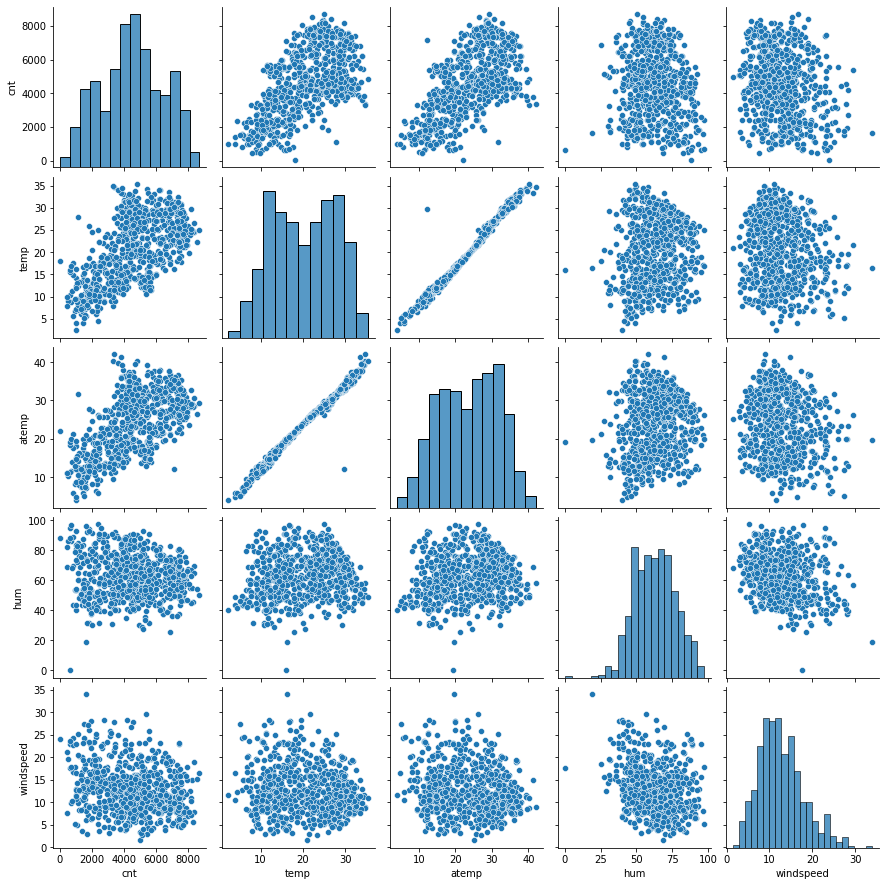

In [385]:
# Pair Plot for numerical variables
vars=["cnt","temp","atemp","hum","windspeed"]
sns.pairplot(bike_new[vars])
plt.show()

Insights
The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

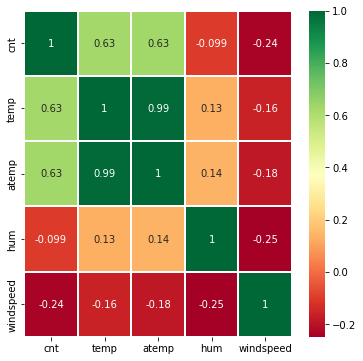

In [386]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_new[vars].corr(), annot = True, cmap="RdYlGn",linewidth =1)

Insight: There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

In [387]:
#removing atemp as it is highly correlated with temp
bike_new.drop('atemp',axis=1,inplace=True)    

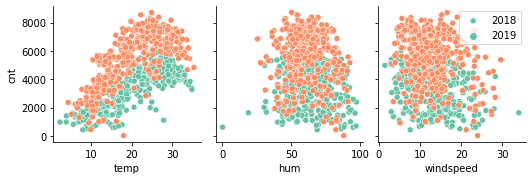

In [388]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike_new, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

Insight: All the parameters have increased values in 2019 compared to 2018. Thus, year may become a key paratemeter in the model

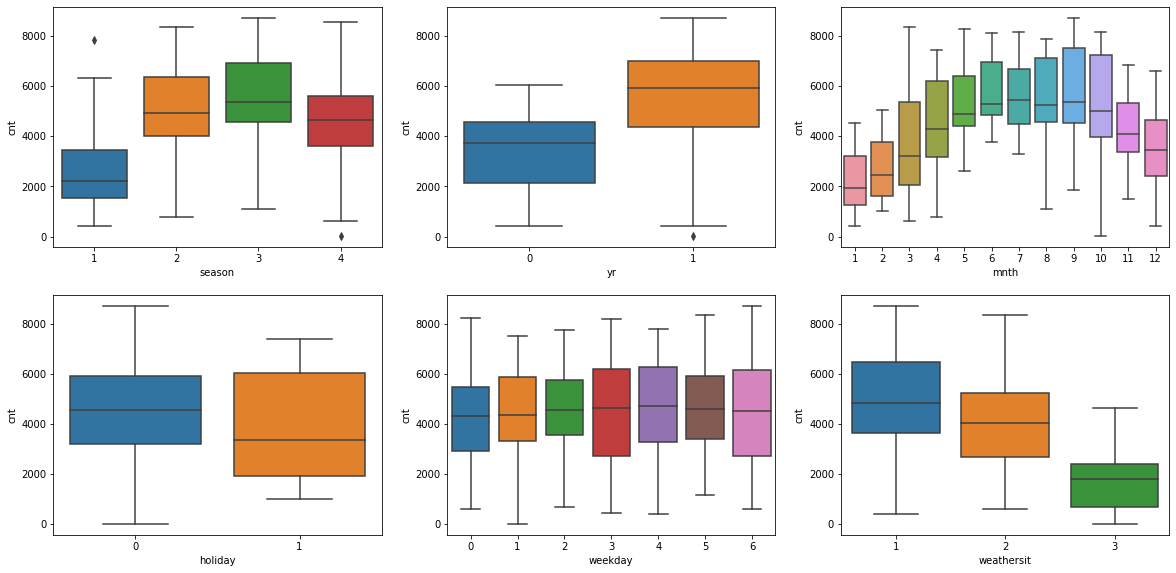

In [389]:
# Box Plots for categorical variables

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike_new)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_new)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_new)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike_new)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike_new)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_new)
plt.show()


Inferences from EDA of categorical and numerical variables: <br/>
Season - We can notice a positive trend in the number of customers in 2 - Summer, 3 - Fall and 4 - Winter seasons .This indicates, season can be a good predictor for the dependent variable.<br/>
Year - The overall business shows a increasing trend in their user base year on year <br/>
Month - Similar to the season trend, there is a postive trend in the months of summer, fall and winter.This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. <br/>
Holiday : On holidays, the users show a wider spread in the counts. On normal days, the users are more than holidays which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. <br/>
Weekday : Weekdays or weekends do not show any specific trend here. <br/>
Weathersit : Clearer weathers show a postive trend in the number of bike users - 1: Clear, Few clouds, Partly cloudy, Partly cloudy - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

Step 3 :Preparing the data

Encoding Categorical columns <br/>
Converting season, mnth,weathersit and weekday to categorical columns

season: converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter <br/>
mnth: converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec <br/>
weathersit: converting weathersit values as 1:Clear, 2:Misty, 3:Cloudy  <br/>
weekday: converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

Converting season

In [390]:


# Imputing season column codes with their descriptions

bike_new.season=bike_new.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_new.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [391]:
# Getting dummy variable for season variable
season = pd.get_dummies(bike_new.season) 
# Check what the dataset 'season' looks like
season.head()


,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [392]:
# Let's drop the first column from season df using 'drop_first = True'

season = pd.get_dummies(bike_new['season'], drop_first = True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [393]:
# Add the results to the original bike_new dataframe

bike_new = pd.concat([bike_new, season], axis = 1)

In [394]:
# Now let's see the head of our dataframe.

bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0


In [395]:
# Drop 'season' as we have created the dummies for it

bike_new.drop(['season'], axis = 1, inplace = True)


In [396]:
bike_new.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0


Converting weathersit

In [397]:
# checking weathersit column codes with their descriptions

bike_new.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

We do not have any data points for type 4 weather. We can create only two dummy variables.

In [398]:
# imputing weathersit column codes with their descriptions

bike_new.weathersit=bike_new.weathersit.map({1:'clear', 2:'misty', 3:'cloudy'})

In [399]:
# Checking dummy variable for weathersit

bike_new.weathersit.value_counts()

clear     463
misty     246
cloudy     21
Name: weathersit, dtype: int64

In [400]:
# Getting dummy variable for weathersit variable
weathersit = pd.get_dummies(bike_new.weathersit) 
# Check what the dataset 'weathersit' looks like
weathersit.head()

,clear,cloudy,misty
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [401]:
# Let's drop the first column from weathersit df using 'drop_first = True'

weathersit = pd.get_dummies(bike_new['weathersit'], drop_first = True)
weathersit.head()

,cloudy,misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [402]:
# Add the results to the original bike_new dataframe

bike_new = pd.concat([bike_new, weathersit], axis = 1)
# Now let's see the head of our dataframe.

bike_new.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,cloudy,misty
0,0,1,0,6,0,misty,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,misty,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [403]:
# Drop 'weathersit' as we have created the dummies for it

bike_new.drop(['weathersit'], axis = 1, inplace = True)

In [404]:
bike_new.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,cloudy,misty
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


Converting month

In [405]:
# imputing month column codes with their descriptions

bike_new.mnth=bike_new.mnth.map({1:'jan', 2:'feb', 3:'mar',4:'apr',5:'may',6:'jun',
                     7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# Checking dummy variable for weathersit

bike_new.mnth.value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [406]:
# Getting dummy variable for mnth variable
mnth = pd.get_dummies(bike_new.mnth) 
# Check what the dataset 'mnth' looks like
mnth.head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [407]:
# Let's drop the first column from mnth df using 'drop_first = True'

mnth = pd.get_dummies(bike_new['mnth'], drop_first = True)
mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [408]:
# Add the results to the original bike_new dataframe

bike_new = pd.concat([bike_new, mnth], axis = 1)
# Now let's see the head of our dataframe.

bike_new.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,jan,0,6,0,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,0,0,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,1,1,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,2,1,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,3,1,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [409]:
# Drop 'mnth' as we have created the dummies for it

bike_new.drop(['mnth'], axis = 1, inplace = True)
# Now let's see the head of our dataframe.

bike_new.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,6,0,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


Converting weekday

In [410]:
# imputing weekday column codes with their descriptions

bike_new.weekday=bike_new.weekday.map({0:'sun', 1:'mon', 2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
# Checking dummy variable for weekday

bike_new.weekday.value_counts()


sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64

In [411]:

# Getting dummy variable for weekday variable
weekday = pd.get_dummies(bike_new.weekday) 
# Check what the dataset 'weekday' looks like
weekday.head()

,fri,mon,sat,sun,thu,tue,wed
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [412]:
# Let's drop the first column from weekday df using 'drop_first = True'

weekday = pd.get_dummies(bike_new['weekday'], drop_first = True)
weekday.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [413]:
# Add the results to the original bike_new dataframe

bike_new = pd.concat([bike_new, weekday], axis = 1)
# Now let's see the head of our dataframe.
bike_new.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,sat,0,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,sun,0,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,mon,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,tue,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,wed,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [414]:
# Drop 'weekday' as we have created the dummies for it

bike_new.drop(['weekday'], axis = 1, inplace = True)
# Now let's see the head of our dataframe.
bike_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Step 4 :Splitting the data into Train & Test Dataset

In [415]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [416]:
# Checking the shape of train dataset

df_train.shape

(510, 29)

In [417]:
# Checking the shape of train dataset

df_test.shape

(219, 29)

Insight: Based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 219 in test dataset

Step 5: Resclaing the feature variables

In [418]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [419]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [420]:

df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


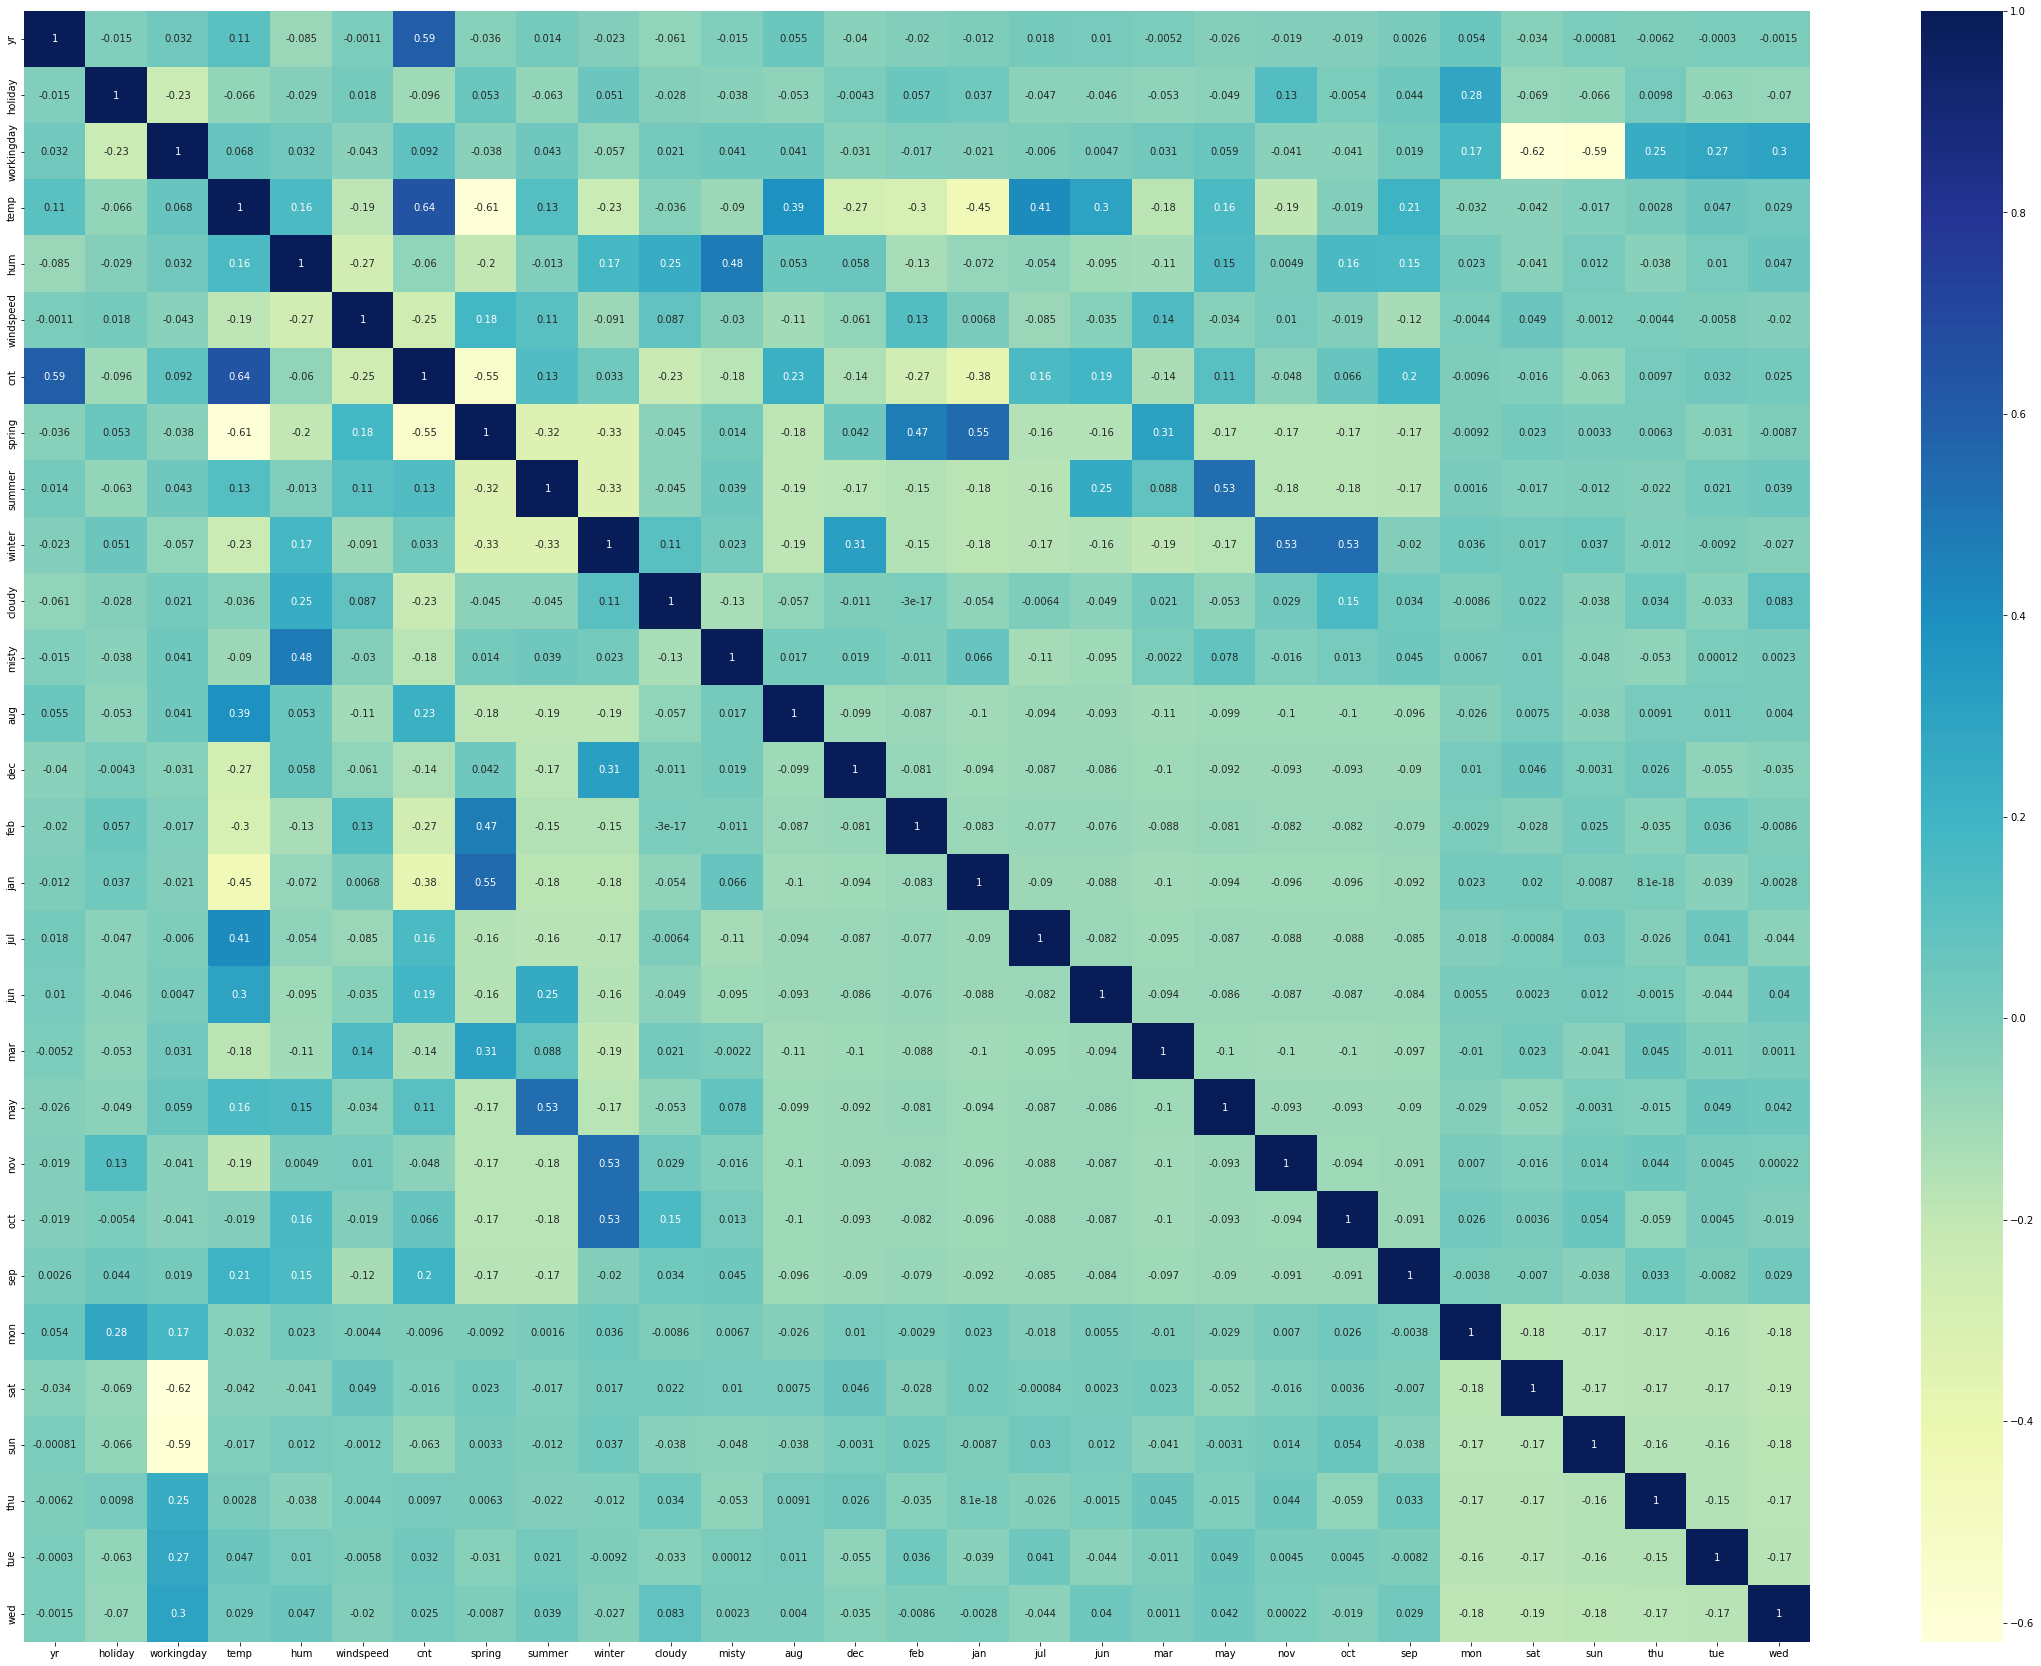

In [421]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


Insight:<br/>
There is multi-colinearity between the variables. We need to consider the factors when developing the model.
workingday variable has high negative correlation with Sat & Sun (where workingday =0) <br/>
Spring is negatively correlated with cnt <br/>
temp and yr has strong correlation with cnt <br/>
misty weather and humidity has correlation <br/>
various months and corresponding weather has correlation <br/>
Count is negatively correlated to 'windspeed' (-0.25 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Step 6: Building the Linear Model

Dividing into X and Y sets for the model building

In [422]:
y_train = df_train.pop('cnt')
X_train = df_train

In [423]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,cloudy,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


Let's now build our first model with all the features.

In [424]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.245085
yr            0.232116
holiday       0.009959
workingday    0.096884
temp          0.450562
hum          -0.151340
windspeed    -0.186453
spring       -0.048159
summer        0.038725
winter        0.105847
cloudy       -0.257443
misty        -0.061066
aug           0.014404
dec          -0.045586
feb          -0.032282
jan          -0.062777
jul          -0.040350
jun          -0.002972
mar           0.001045
may           0.023940
nov          -0.041851
oct           0.007534
sep           0.081060
mon          -0.020907
sat           0.096389
sun           0.041853
thu          -0.009237
tue          -0.018890
wed          -0.005388
dtype: float64

In [425]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          8.74e-182
Time:                        13:08:33   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2451      0.035      6.955      0.0

This model has an Adjusted R-squared value of 84.5% which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.

Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the statsmodels library to build models using the shortlisted features (this is also because SKLearn doesn't have Adjusted R-squared that statsmodels has).

In [426]:
# Import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15,step=1)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True False  True  True  True False
 False False  True  True False False False False False  True False  True
  True False False False]
[ 1  1  1  1  1  1  1  4  1  1  1  9  3  5  1  1 13 14  6  2 12  1  7  1
  1 10  8 11]


In [427]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,winter,cloudy,misty,jan,jul,sep,sat,sun
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,0,0,1,0


In [428]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          4.03e-190
Time:                        13:08:33   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2503      0.025      9.865      0.0

Note that the new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from 84.5% to 84.1%. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [429]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [430]:
a=X_train_rfe1.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,41.60
13,sat,10.14
14,sun,9.82
3,temp,3.19
6,spring,2.72
1,holiday,2.58
4,hum,1.90
7,winter,1.81
9,misty,1.57
10,jan,1.55


In [431]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 8 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select=8 , step=1)

# Fit with 8 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False  True
  True False False False]
[ 1  1  1  1  1  1  3 11  7  2  5 16 10 12  8  4 20 21 13  9 19  6 14  1
  1 17 15 18]


In [432]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 8 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,workingday,temp,hum,windspeed,sat,sun
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,1
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0


In [433]:
# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     203.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.51e-142
Time:                        13:08:33   Log-Likelihood:                 381.48
No. Observations:                 510   AIC:                            -747.0
Df Residuals:                     502   BIC:                            -713.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2439      0.026      9.526      0.0

Now let's check the VIF for these selected features and decide further.

In [434]:
b=X_train_rfe2.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,25.99
6,sat,6.57
7,sun,6.27
1,holiday,1.86
4,hum,1.10
5,windspeed,1.10
3,temp,1.07
0,yr,1.02


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'workingday' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [435]:
# Let's drop the 'workingday' column
X_train_rfe2.drop("workingday",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,hum,windspeed,sat,sun
653,1.0,1,0,0.509887,0.575354,0.300794,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,1
482,1.0,1,0,0.395666,0.504508,0.188475,1,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.605840,0.355596,0,0
578,1.0,1,0,0.863973,0.679690,0.187140,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,1,0


In [436]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 7 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     203.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.51e-142
Time:                        13:08:33   Log-Likelihood:                 381.48
No. Observations:                 510   AIC:                            -747.0
Df Residuals:                     502   BIC:                            -713.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3300      0.032     10.416      0.0

In [437]:
b=X_train_rfe2.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,8.11
2,temp,6.31
4,windspeed,3.46
0,yr,2.00
5,sat,1.22
6,sun,1.20
1,holiday,1.04


In [438]:
# Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,windspeed,sat,sun
653,1.0,1,0,0.509887,0.300794,0,0
576,1.0,1,0,0.815169,0.264686,0,0
426,1.0,1,0,0.442393,0.255342,1,0
728,1.0,1,0,0.245101,0.663106,0,1
482,1.0,1,0,0.395666,0.188475,1,0
...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0
578,1.0,1,0,0.863973,0.187140,0,0
53,1.0,0,0,0.202618,0.111379,0,0
350,1.0,0,0,0.248216,0.431816,1,0


In [439]:
X_train_rfe2.drop("sat",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,windspeed,sun
653,1.0,1,0,0.509887,0.300794,0
576,1.0,1,0,0.815169,0.264686,0
426,1.0,1,0,0.442393,0.255342,0
728,1.0,1,0,0.245101,0.663106,1
482,1.0,1,0,0.395666,0.188475,0
...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0
578,1.0,1,0,0.863973,0.187140,0
53,1.0,0,0,0.202618,0.111379,0
350,1.0,0,0,0.248216,0.431816,0


In [440]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 5 variables
lm4 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     255.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.16e-135
Time:                        13:08:34   Log-Likelihood:                 360.52
No. Observations:                 510   AIC:                            -709.0
Df Residuals:                     504   BIC:                            -683.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1666      0.019      8.633      0.0

In [441]:
b=X_train_rfe2.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.10
3,windspeed,2.73
0,yr,1.98
4,sun,1.15
1,holiday,1.03


Model 5: Building the model after adding cloudy.

In [442]:
# Adding cloudy variable and building the model.
X_train_rfe2['cloudy']=X_train['cloudy']
# Adding a constant to X_train_rfe
X_train_rfe2=sm.add_constant(X_train_rfe2)

# Creating a LR object which we will use to fit the line.
lm5 = sm.OLS(y_train, X_train_rfe2).fit()

#Checking the summary
lm5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     244.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.24e-145
Time:                        13:08:34   Log-Likelihood:                 386.74
No. Observations:                 510   AIC:                            -759.5
Df Residuals:                     503   BIC:                            -729.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1718      0.018      9.355      0.000       0.136       0.208
yr             0.2339      0.010     22.954      0.000       0.214       0.254
holiday       -0.0828      0.032     -2.570      0.010      -0.146      -0.020
temp           0.5484      0.023     23.847      0.000       0.503       0.594
windspeed     -0.1778      0.030     -5.839      0.000      -0.238      -0.118
sun           -0.0410      0.014     -2.829      0.005      -0.069      -0.013
cloudy        -0.2223      0.030     -7.380      0.000      -0.282      -0.163
==============================================================================
Omnibus:                        8.710   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.868
Skew:                          -0.273   Prob(JB):                       0.0119
Kurtosis:                       3.346   Cond. No.                         9.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [443]:
b=X_train_rfe2.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.10
3,windspeed,2.79
0,yr,1.98
4,sun,1.15
5,cloudy,1.04
1,holiday,1.03


In [445]:
# Adding summer variable and building the model.
X_train_rfe2['summer']=X_train['summer']
# Adding a constant to X_train_rfe
X_train_rfe2=sm.add_constant(X_train_rfe2)

# Creating a LR object which we will use to fit the line.
lm6 = sm.OLS(y_train, X_train_rfe2).fit()

#Checking the summary
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     213.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          4.57e-146
Time:                        13:09:02   Log-Likelihood:                 390.60
No. Observations:                 510   AIC:                            -765.2
Df Residuals:                     502   BIC:                            -731.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1720      0.018      9.432      0.000       0.136       0.208
yr             0.2340      0.010     23.122      0.000       0.214       0.254
holiday       -0.0776      0.032     -2.418      0.016      -0.141      -0.015
temp           0.5391      0.023     23.352      0.000       0.494       0.584
windspeed     -0.1897      0.031     -6.210      0.000      -0.250      -0.130
sun           -0.0404      0.014     -2.805      0.005      -0.069      -0.012
cloudy        -0.2177      0.030     -7.263      0.000      -0.277      -0.159
summer         0.0330      0.012      2.768      0.006       0.010       0.056
==============================================================================
Omnibus:                        9.004   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.721
Skew:                          -0.249   Prob(JB):                      0.00775
Kurtosis:                       3.457   Cond. No.                         9.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [446]:
b=X_train_rfe2.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.24
3,windspeed,2.88
0,yr,1.98
6,summer,1.38
4,sun,1.15
5,cloudy,1.05
1,holiday,1.03


In [447]:
# Adding sep variable and building the model.
X_train_rfe2['sep']=X_train['sep']
# Adding a constant to X_train_rfe
X_train_rfe2=sm.add_constant(X_train_rfe2)

# Creating a LR object which we will use to fit the line.
lm7 = sm.OLS(y_train, X_train_rfe2).fit()

#Checking the summary
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     194.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.82e-148
Time:                        13:11:07   Log-Likelihood:                 399.02
No. Observations:                 510   AIC:                            -780.0
Df Residuals:                     501   BIC:                            -741.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1720      0.018      9.577      0.000       0.137       0.207
yr             0.2347      0.010     23.549      0.000       0.215       0.254
holiday       -0.0838      0.032     -2.652      0.008      -0.146      -0.022
temp           0.5180      0.023     22.222      0.000       0.472       0.564
windspeed     -0.1818      0.030     -6.031      0.000      -0.241      -0.123
sun           -0.0384      0.014     -2.709      0.007      -0.066      -0.011
cloudy        -0.2225      0.030     -7.534      0.000      -0.281      -0.164
summer         0.0421      0.012      3.528      0.000       0.019       0.066
sep            0.0782      0.019      4.102      0.000       0.041       0.116
==============================================================================
Omnibus:                        9.455   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.696
Skew:                          -0.286   Prob(JB):                      0.00784
Kurtosis:                       3.361   Cond. No.                         9.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [448]:
b=X_train_rfe2.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.61
3,windspeed,2.90
0,yr,1.98
6,summer,1.43
7,sep,1.19
4,sun,1.16
5,cloudy,1.05
1,holiday,1.03


All the VIF values and p-values seem to be in the permissible range now. Also the Adjusted R-squared value has dropped from 84.5% with 28 variables to just 76% using 8 variables. This model is explaining most of the variance without being too complex. So let's proceed with this model.

Step 7:Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

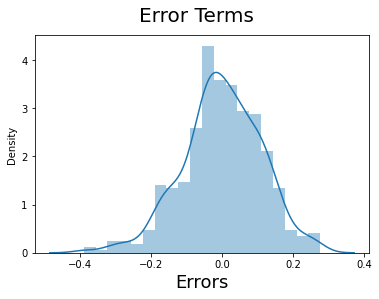

In [449]:
y_train_cnt = lm7.predict(X_train_rfe2)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)        

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

Linear Relationship

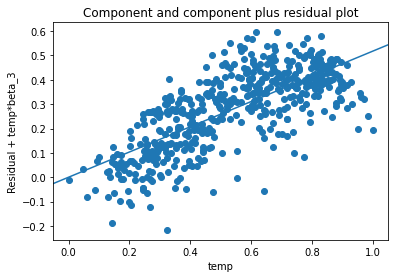

In [450]:
sm.graphics.plot_ccpr(lm7, 'temp')
plt.show()

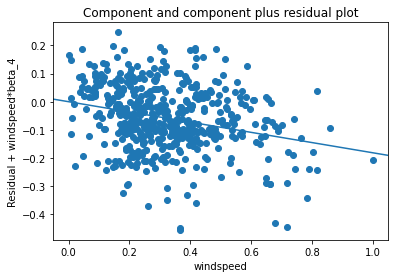

In [451]:
sm.graphics.plot_ccpr(lm7, 'windspeed')
plt.show()

Insight: The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved

Homoscedasticity

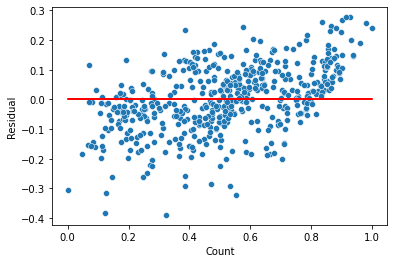

In [452]:
y_train_pred = lm7.predict(X_train_rfe2)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Insight: There is no visible pattern in residual values, thus homoscedacity is well preserved


Step 8: Making Predictions Using the Final Model

We would first need to scale the test set as well. So let's start with that.

In [453]:
X_train_rfe2,

(     const  yr  holiday      temp  windspeed  sun  cloudy  summer  sep
 653    1.0   1        0  0.509887   0.300794    0       0       0    0
 576    1.0   1        0  0.815169   0.264686    0       0       0    0
 426    1.0   1        0  0.442393   0.255342    0       0       0    0
 728    1.0   1        0  0.245101   0.663106    1       0       0    0
 482    1.0   1        0  0.395666   0.188475    0       0       1    0
 ..     ...  ..      ...       ...        ...  ...     ...     ...  ...
 526    1.0   1        0  0.824514   0.355596    0       0       1    0
 578    1.0   1        0  0.863973   0.187140    0       0       0    0
 53     1.0   0        0  0.202618   0.111379    0       0       0    0
 350    1.0   0        0  0.248216   0.431816    0       0       0    0
 79     1.0   0        0  0.462664   0.529881    0       0       1    0
 
 [510 rows x 9 columns],)

In [454]:
# let's recall the set of variables which are to be scaled
num_vars

['temp', 'hum', 'windspeed', 'cnt']

In [455]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [456]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test

In [457]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=X_train_rfe2.drop('const',axis=1).columns
col2

Index(['yr', 'holiday', 'temp', 'windspeed', 'sun', 'cloudy', 'summer', 'sep'], dtype='object')

In [458]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col2]

In [459]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      219 non-null    float64
 1   yr         219 non-null    int64  
 2   holiday    219 non-null    int64  
 3   temp       219 non-null    float64
 4   windspeed  219 non-null    float64
 5   sun        219 non-null    uint8  
 6   cloudy     219 non-null    uint8  
 7   summer     219 non-null    uint8  
 8   sep        219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 11.1 KB


In [460]:
# Making predictions
y_pred = lm7.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

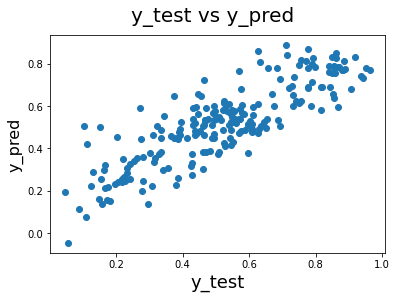

In [461]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

We can see that the equation of our best fitted line is:

cnt = 0.1720 + (yr × 	0.2347)  + (temp × 0.5180) + (summer × 0.0421) + (sep × 0.0782) − (windspeed × 0.1818)  − (holiday × 0.0838) − (sun × 0.0384) - (cloudy × 0.2225)

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [462]:
# r2_score for 5 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7170249973475676

Thus, for the model with 8 variables, the r-squared on training and test data is about 76% and 72% respectively. The adjusted r-squared on the train set is about is about 75%.

Checking the correlations between the final predictor variables

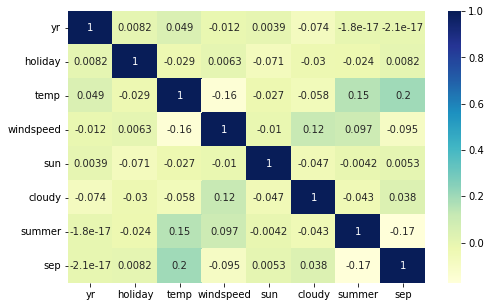

In [463]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(bike_new[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations.

Thus, the final model consists of the 8 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.